In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels import datasets
import seaborn as sns





In [2]:
#Load csv file into dataframe
df=pd.read_csv(r'C:\Users\hsman\OneDrive\Documents\hotel_bookings.csv')
#list out all columns
df.columns



Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [3]:
#Create dictionary for conversion of STR MNTH value into INT MNTH value
d={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
   'October':10,'November':11,'December':12}
df['arrival_date_month']=df['arrival_date_month'].map(d)

#Create dictionary for conversion of reservation status
d1={'Check-Out':1,'Canceled':2,'No-Show':3}
df['reservation_status']=df['reservation_status'].map(d1)
d1

{'Check-Out': 1, 'Canceled': 2, 'No-Show': 3}

(array([0.00918222, 0.005697  , 0.00405859, 0.00342438, 0.00269627,
        0.00231786, 0.00225765, 0.00157914, 0.00122475, 0.00103727,
        0.00104943, 0.000827  , 0.00060208, 0.00034472, 0.000287  ]),
 array([-10.        ,  17.33333333,  44.66666667,  72.        ,
         99.33333333, 126.66666667, 154.        , 181.33333333,
        208.66666667, 236.        , 263.33333333, 290.66666667,
        318.        , 345.33333333, 372.66666667, 400.        ]),
 <a list of 15 Patch objects>)

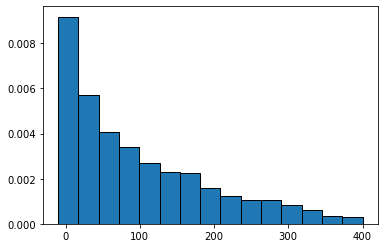

In [4]:
#Hist 1 - Variable Lead Time
x=df['lead_time']
plt.hist(x,15,range=[-10,400],density=1,edgecolor='k',align='mid')
#plt.axvline(df['lead_time'].mean(),color='k',linestyle='dashed',linewidth=1)




In [79]:
#Descriptive Statistics for Lead Time
df['lead_time'].describe()




count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [80]:
print("The Median is",df['lead_time'].median())
print("The Mode is", df['lead_time'].mode())

The Median is 69.0
The Mode is 0    0
dtype: int64


0    0
dtype: int64

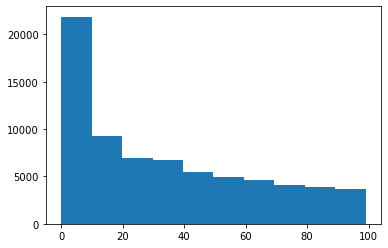

In [76]:
xt=df[df['lead_time'] < 100]
xtt=xt['lead_time']
plt.hist(xtt)

xtt.mode()

(array([ 1316.,  4665.,  6274., 13943., 12921., 16112., 12604., 11552.,
         9217.,  7249.,  5135.,  3963.,  3250.,  1903.,  1977.]),
 array([ 20.,  32.,  44.,  56.,  68.,  80.,  92., 104., 116., 128., 140.,
        152., 164., 176., 188., 200.]),
 <a list of 15 Patch objects>)

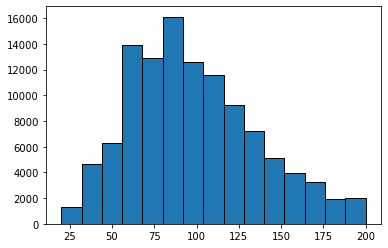

In [89]:
#Hist 2 - Average Daily Rate
x11=df[df['adr'] > 20]

x1=x11['adr']
plt.hist(x1,15,range=[20,200],edgecolor='k',align='mid')





In [83]:
#Descriptive Statistics for ADR
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [85]:
print("The Median is",df['adr'].median())
print("The Mode is", df['adr'].mode())

The Median is 94.575
The Mode is 0    62.0
dtype: float64


Text(0, 0.5, 'lead_time')

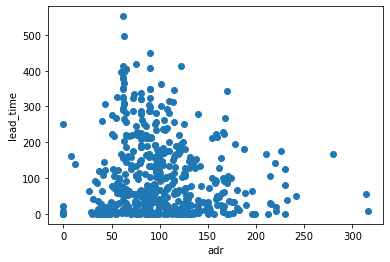

In [101]:
df_sample=df.sample(500)
x1=df_sample['adr']
y1=df_sample['lead_time']
plt.scatter(x1,y1)
plt.xlabel('adr')
plt.ylabel('lead_time')

In [123]:
#Covariance
data=np.array([x1,y1])
covMatrix=np.cov(data,bias=True)
print (covMatrix)

[[ 2200.63400417  -463.29102852]
 [ -463.29102852 11898.360204  ]]


In [122]:
#Pearson Coeffecient
x1=df_sample['adr']
y1=df_sample['lead_time']
data=np.array([x1,y1])
covMatrix=np.cov(data,bias=True)
print (covMatrix)
print("The pearsons Coeffecient is:", np.corrcoef(x1,y1)[1,0])

[[ 2200.63400417  -463.29102852]
 [ -463.29102852 11898.360204  ]]
The pearsons Coeffecient is: -0.09053915239819718


Text(0, 0.5, '# of special requests')

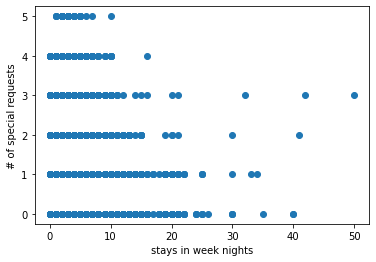

In [111]:
#Scatter Plot: # of Special Requests to Stays in Week Nights
x1=df['stays_in_week_nights']
y1=df['total_of_special_requests']
plt.scatter(x1,y1)
plt.xlabel('stays in week nights')
plt.ylabel('# of special requests')

In [112]:
#Covariance
data=np.array([x1,y1])
covMatrix=np.cov(data,bias=True)
print (covMatrix)

[[3.64152349 0.10316552]
 [0.10316552 0.62852407]]


In [124]:
#Pearson Coeffecient
x1=df['stays_in_week_nights']
y1=df['total_of_special_requests']
np.corrcoef(x1,y1)[1,0]

0.06819178170957262

(array([ 7966., 10661., 11857., 13772., 12719., 17153., 13609., 13094.,
         9824.,  8735.]),
 array([ 1. ,  6.2, 11.4, 16.6, 21.8, 27. , 32.2, 37.4, 42.6, 47.8, 53. ]),
 <a list of 10 Patch objects>)

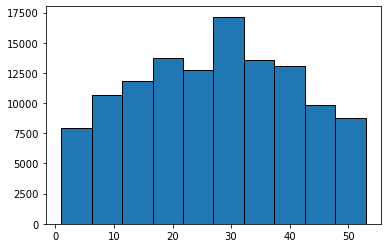

In [8]:
#Hist 3 - Arrival Date Week #
x2=df['arrival_date_week_number']
plt.hist(x2,edgecolor='k',align='mid')

(array([11536., 11913., 11682., 11261., 11760., 12486., 11851., 11205.,
        12109., 13587.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

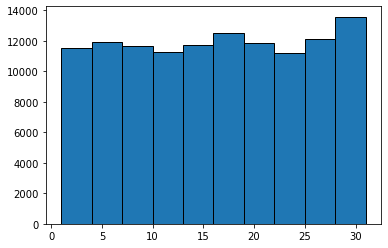

In [9]:
#Hist 4 - Arrival Date Day of Month
x3=df['arrival_date_day_of_month']
plt.hist(x3,10,edgecolor='k',align='mid')

(array([  403.,     0.,     0., 23027.,     0.,     0., 89680.,     0.,
            0.,  6202.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

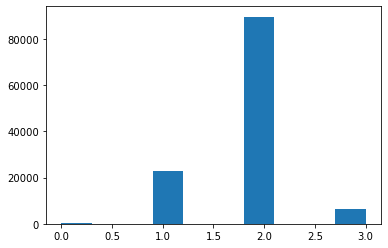

In [10]:
#Hist 5 - # of Adults
x4=df['adults']
plt.hist(x4,range=[0,3])

(array([75166.,     0.,     0.,     0.,     0., 43017.,     0.,     0.,
            0.,  1207.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

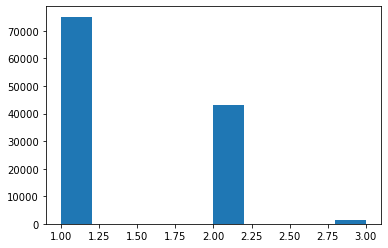

In [90]:
#Histogram - Reservation Status
x5=df['reservation_status']
plt.hist(x5)

(array([7.0318e+04, 0.0000e+00, 3.3226e+04, 0.0000e+00, 1.2969e+04,
        0.0000e+00, 2.4970e+03, 0.0000e+00, 3.4000e+02, 4.0000e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

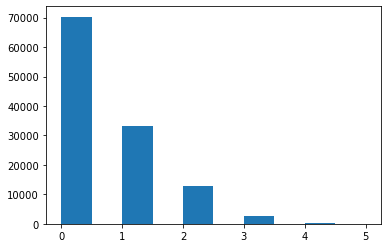

In [91]:
#Histogram - Total of special requests
x6=df['total_of_special_requests']
plt.hist(x6)

In [92]:
#Descriptive Statistics for special requests
df['total_of_special_requests'].describe()


count    119390.000000
mean          0.571363
std           0.792798
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: total_of_special_requests, dtype: float64

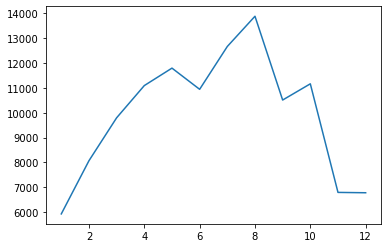

In [13]:
#Look at what months have the highest bookings
ax=df.groupby('arrival_date_month').count()[['adr']]
plt.plot(ax)






(0.0, 500.0)

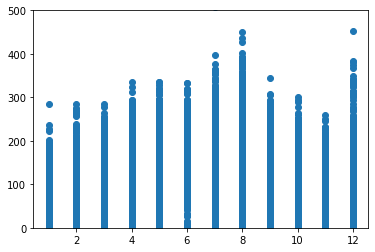

In [14]:
#SCATTER PLOT FOR ARRIVAL BY MONTH WITH ADR
x=df['arrival_date_month']
y=df['adr']
plt.scatter(x,y)
plt.ylim(0,500)



In [15]:
#Covariance Calculation for variables arrival_date_month & adr
data=np.array([x,y])
covMatrix=np.cov(data,bias=True)
print (covMatrix)

[[   9.55184386   12.38782086]
 [  12.38782086 2553.84470883]]


(array([3.7955e+04, 5.5942e+04, 2.0640e+04, 2.5280e+03, 8.8700e+02,
        1.0920e+03, 6.9000e+01, 1.2000e+02, 2.0000e+01, 9.1000e+01]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

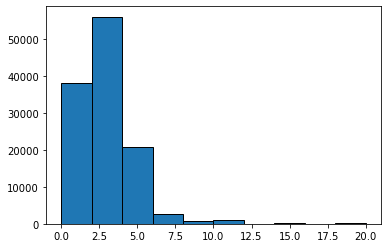

In [16]:
#Hist  - Stay in Week Nights
x6=df['stays_in_week_nights']
plt.hist(x6,10,range=[0,20], edgecolor='k')


In [93]:
#Descriptive Statistics for special requests
df['stays_in_week_nights'].describe()

count    119390.000000
mean          2.500302
std           1.908286
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          50.000000
Name: stays_in_week_nights, dtype: float64

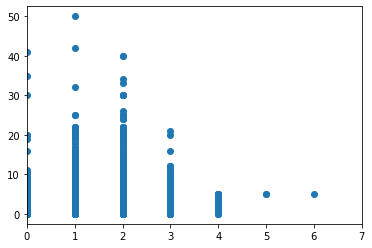

[[0.33554049 0.10277385]
 [0.10277385 3.64152349]]


In [17]:
x10=df['adults']
y10=df['stays_in_week_nights']
plt.scatter(x10,y10)
plt.xlim(0,7)
plt.show()

#Covariance Calculation for adults and stay in week nights
data=np.array([x10,y10])
covMatrix=np.cov(data,bias=True)
print (covMatrix)

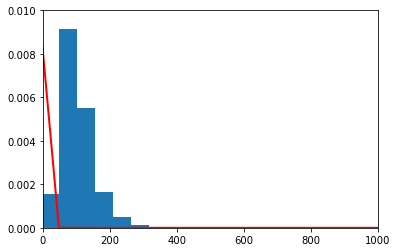

In [36]:
#Pareto Distribution Arrival Date Month
import matplotlib.pyplot as plt
a, m = 3., 2.  # shape and mode
s= df['adr'] 
count, bins, _ = plt.hist(s, 100, density=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.xlim(0,1000)
plt.ylim(0,0.010)
plt.show()


Text(0.5, 0, 'stays in week night')

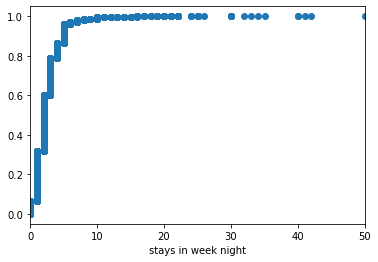

In [95]:
x_1=np.sort(df['stays_in_week_nights'])
n=x.size
y=np.arange(1,n+1)/n
plt.scatter(x=x_1,y=y)
plt.xlim(0,50)
plt.xlabel('stays in week night')

Text(0.5, 0, 'average daily rate')

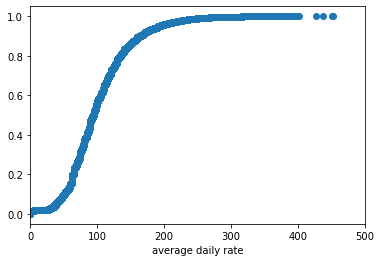

In [96]:
#CDF
x=np.sort(df['adr'])
n=x.size
y=np.arange(1,n+1)/n
plt.scatter(x=x,y=y)
plt.xlim(0,500)
plt.xlabel('average daily rate')


(array([0.00088089, 0.00646916, 0.01035987, 0.00833034, 0.0042985 ,
        0.00213002, 0.00111998, 0.00061132, 0.00028662, 0.00011537]),
 array([ 11. ,  39.9,  68.8,  97.7, 126.6, 155.5, 184.4, 213.3, 242.2,
        271.1, 300. ]),
 <a list of 10 Patch objects>)

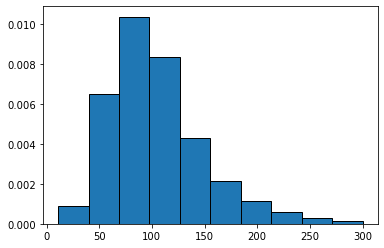

In [142]:
x=df[df['lead_time'] > 10]
n=x['adr']
plt.hist(n,10,range=[11,300],density=1,edgecolor='k',align='mid')
#plt.axvline(df['lead_time'].mean(),color='k',linestyle='dashed',linewidth=1)


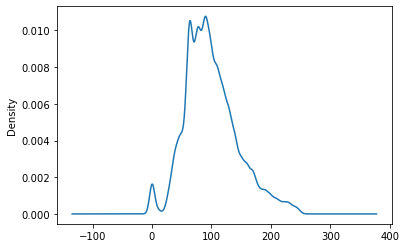

In [164]:
#Probability Distribution Function for ADR
from scipy.stats import norm
import matplotlib.pyplot as plt


x=df[df['lead_time'] > 10]
x=df[df['adr'] < 250]
n=x['adr']

ax=n.plot.kde()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    adr   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.703
Method:                 Least Squares   F-statistic:                              474.7
Date:                Tue, 17 Nov 2020   Prob (F-statistic):                    1.34e-54
Time:                        21:12:05   Log-Likelihood:                         -1092.1
No. Observations:                 200   AIC:                                      2186.
Df Residuals:                     199   BIC:                                      2190.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
arrival_date_month    11.7997      0.542     21.789      0.000      10.732      12.868
==============================================================================
Omnibus:                        9.201   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                5.331
Skew:                          -0.217   Prob(JB):                       0.0696
Kurtosis:                       2.328   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

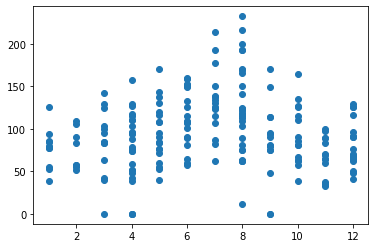

In [231]:
new=df[df['reservation_status']==1]
new=df[df['adr'] > 40]
new=df[df['adr']< 250]
new_1=new.sample(200)
x=new_1['arrival_date_month']
y=new_1['adr']

plt.scatter(x,y)


XE=sm.add_constant(x)
mod=sm.OLS(y,x)
res=mod.fit()
res.summary()


In [230]:
results = smf.ols('adr ~ arrival_date_month', data=new_1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    adr   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.437
Date:                Tue, 17 Nov 2020   Prob (F-statistic):              0.232
Time:                        21:11:45   Log-Likelihood:                -1057.6
No. Observations:                 200   AIC:                             2119.
Df Residuals:                     198   BIC:                             2126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             93.9425      7

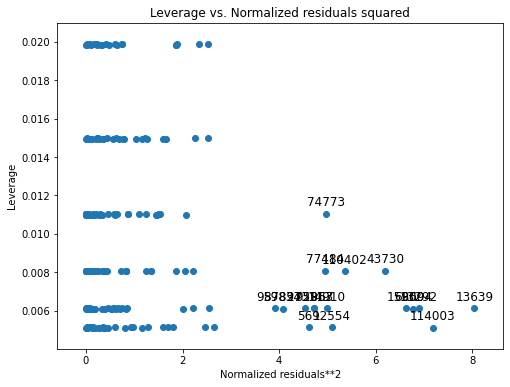

In [232]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

Text(0, 0.5, 'average daily rate')

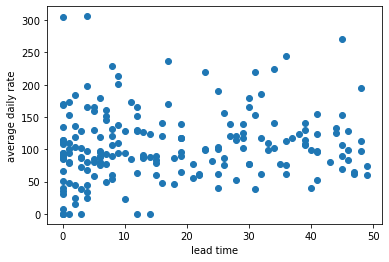

In [243]:
new=df[df['reservation_status']==1]

new=df[df['adr']< 200]
new=df[df['lead_time']<50]

new_1=new.sample(200)
x=new_1['lead_time']
y=new_1['adr']
plt.scatter(x,y)
plt.xlabel("lead time")
plt.ylabel("average daily rate")


In [241]:
results = smf.ols('adr ~ lead_time', data=new_1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    adr   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     9.407
Date:                Tue, 17 Nov 2020   Prob (F-statistic):            0.00246
Time:                        22:14:04   Log-Likelihood:                -1033.4
No. Observations:                 200   AIC:                             2071.
Df Residuals:                     198   BIC:                             2077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.8371      4.549     18.650      0.0

In [107]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)

[-0.05674943 18.71211737  1.36123215  9.58469339  9.69153525  1.34874516]


In [109]:
#simple linear regression
XE=sm.add_constant(x100)
mod=sm.OLS(Y,x100)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    adr   R-squared (uncentered):                   0.366
Model:                            OLS   Adj. R-squared (uncentered):              0.366
Method:                 Least Squares   F-statistic:                          6.882e+04
Date:                Tue, 17 Nov 2020   Prob (F-statistic):                        0.00
Time:                        09:42:52   Log-Likelihood:                     -7.0736e+05
No. Observations:              119390   AIC:                                  1.415e+06
Df Residuals:                  119389   BIC:                                  1.415e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lead_time      0.4610      0.002    262.327      0.000       0.458       0.464
==============================================================================
Omnibus:                   110045.093   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        291143893.673
Skew:                           3.134   Prob(JB):                         0.00
Kurtosis:                     244.841   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
XA=df[['lead_time','adults','arrival_date_month','total_of_special_requests','adr']]
YA=df['reservation_status']

XMM=sm.add_constant(XA)

Kmm=sm.OLS(YA,XA).fit()
Kmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     reservation_status   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                          1.410e+05
Date:                Tue, 17 Nov 2020   Prob (F-statistic):                        0.00
Time:                        07:47:35   Log-Likelihood:                     -1.0009e+05
No. Observations:              119390   AIC:                                  2.002e+05
Df Residuals:                  119385   BIC:                                  2.002e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
lead_time                     0.0015   1.55e-05     99.972      0.000       0.002       0.002
adults                        0.3715      0.002    167.540      0.000       0.367       0.376
arrival_date_month            0.0389      0.000     82.078      0.000       0.038       0.040
total_of_special_requests    -0.1250      0.002    -59.760      0.000      -0.129      -0.121
adr                           0.0027   3.21e-05     83.737      0.000       0.003       0.003
==============================================================================
Omnibus:                    41051.909   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4785262.672
Skew:                          -0.643   Prob(JB):                         0.00
Kurtosis:                      33.989   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
df_2=df.sample(100)
results = smf.ols('reservation_status ~ lead_time + adults + arrival_date_month + total_of_special_requests + adr', data=df_2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     reservation_status   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.239
Date:                Tue, 17 Nov 2020   Prob (F-statistic):              0.297
Time:                        07:55:04   Log-Likelihood:                -68.884
No. Observations:                 100   AIC:                             149.8
Df Residuals:                      94   BIC:                             165.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

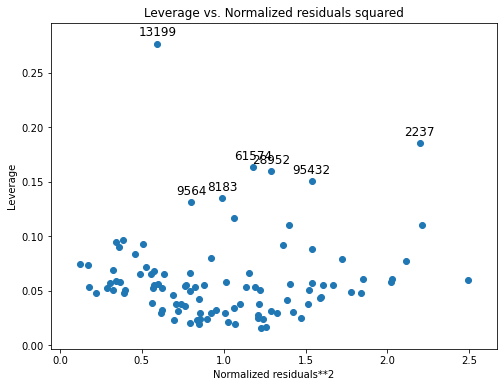

In [52]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)